In [0]:
"""
TODO - Create a Deep Neural Network with Word Embeddings for Newsfiles.
 Warning : Uploading files take too long
0 is false 1 is true
"""


'\nTODO - Create a Deep Neural Network with Word Embeddings for Newsfiles.\n Warning : Uploading files take too long\n0 is false 1 is true\n'

In [0]:
import pandas as pd
import numpy as np


In [0]:
#Reading and Preprocessing
news_train=pd.read_csv('fulltrain.csv',names=['label','Statement'])
news_test=pd.read_csv('newsfiles_test.csv',names=['label','Statement'])

In [0]:
print(news_train.shape)
print(news_test.shape)

(48854, 2)
(3000, 2)


In [0]:
#Ratings are as follows 1:"Satire",2:"Hoax",3:"Propaganda",4:"Trusted"
#Change Hoax to False(0) and Trusted to True(1) and remove Satire and Propaganda

def nf_ratechange(x):
    h=0
    for i in x.label:
        if i==2:
            x.at[h,'label']= 0
            
        elif i==4:
            x.at[h,'label']= 1
            
        elif i==1 or i==3:
            x.drop([h],inplace=True)
        h=h+1

In [0]:
#changing Ratings
nf_ratechange(news_train)
nf_ratechange(news_test)

In [0]:
news=pd.concat([news_train,news_test])

In [0]:
print(news.shape)
print(news.columns)
print(news.head())

(18437, 2)
Index(['label', 'Statement'], dtype='object')
       label                                          Statement
14047      0  Ralph Peters Is Suspended By Fox News After Ve...
14048      0  Michelle Obama Picks A Fight With Donald, He F...
14049      0  Analyst Observes Something VERY Off About Trum...
14050      0  Marine Completely DESTROYS Michelle Obama To H...
14051      0  Youll Never Believe The Excuse This Mother Gav...


In [0]:
nf_x=news.Statement
nf_y=news.label

In [0]:
#Final Dataset : news

In [0]:
"""
Splitting the dataset 80 10 10

"""

'\nSplitting the dataset 80 10 10\n\n'

In [0]:
#train test split to form test from news
from sklearn.model_selection import train_test_split

X_train_temp, nf_test_x, y_train_temp, nf_test_y = train_test_split(nf_x,nf_y,test_size=0.1,random_state=12)
print(X_train_temp.size)
print(nf_test_x.size)

# nf_test_x : Final testing file with statements
# nf_test_y : Final testing file with ratings

nf_train_x, nf_dev_x, nf_train_y, nf_dev_y = train_test_split(X_train_temp,y_train_temp,test_size=1844,random_state=12)

print(nf_train_x.size)
print(nf_dev_x.size)

# nf_train_x : Training file with statements
# nf_train_y : Training file with ratings
# nf_dev_x   : Development testing file with statements
# nf_dev_y   : Development testing file with ratings
print(type(nf_train_x))
print("Final size of train/dev/test : ",nf_train_x.size,"/",nf_dev_x.size,"/",nf_test_x.size)



16593
1844
14749
1844
<class 'pandas.core.series.Series'>
Final size of train/dev/test :  14749 / 1844 / 1844


In [0]:
import tensorflow
import pandas as pd
import keras 

Using TensorFlow backend.


In [0]:
#word embedding 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(nf_train_x)

em_nf_train_x = tokenizer.texts_to_sequences(nf_train_x)
em_nf_dev_x = tokenizer.texts_to_sequences(nf_dev_x)
em_nf_test_x = tokenizer.texts_to_sequences(nf_test_x)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index



In [0]:
#requires padding to keep consistent size

from keras.preprocessing.sequence import pad_sequences

maxlen =0
for i in em_nf_train_x:
    if(len(i)>maxlen):
        maxlen=len(i)
print(maxlen)


em_nf_train_x = pad_sequences(em_nf_train_x, padding='post', maxlen=maxlen)
em_nf_dev_x = pad_sequences(em_nf_dev_x, padding='post', maxlen=maxlen)
em_nf_test_x = pad_sequences(em_nf_test_x, padding='post', maxlen=maxlen)

print(em_nf_train_x[0, :])

4734
[13762  8989  4890 ...     0     0     0]


In [0]:
from keras.models import Sequential
from keras import layers
import time

In [0]:
#important for analysis

import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [0]:
"""
Time to start Building models
"""


'\nTime to start Building models\n'

In [0]:
#Model 1 
embedding_dim = 50

model1 = Sequential()
model1.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model1.add(layers.GlobalMaxPool1D())
model1.add(layers.Dense(34, activation='relu'))
model1.add(layers.Dense(23, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 4734, 50)          5227950   
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 34)                1734      
_________________________________________________________________
dense_8 (Dense)              (None, 23)                805       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 24        
Total params: 5,230,513
Trainable params: 5,230,513
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9951
Time take -50.921351007620494


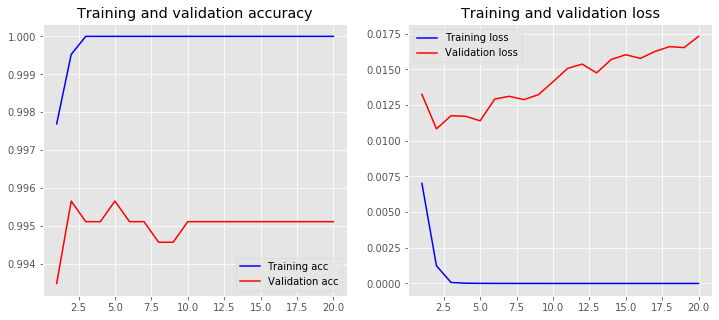

In [0]:

start=time.time()
history1 = model1.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_dev_x, nf_dev_y),
                    batch_size=10)
loss, accuracy = model1.evaluate(em_nf_train_x, nf_train_y, verbose=False)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(em_nf_dev_x, nf_dev_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history1)



In [0]:
#Model 2
embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

model2 = Sequential()
model2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model2.add(layers.GlobalMaxPool1D())
model2.add(layers.Dense(h1, activation='relu'))
model2.add(layers.Dense(h2, activation='relu'))
model2.add(layers.se(1, actiDenvation='sigmoid'))
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

16 10
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 4734, 25)          2613975   
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 25)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                416       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 2,614,572
Trainable params: 2,614,572
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9946
Time take -26.351127668221793


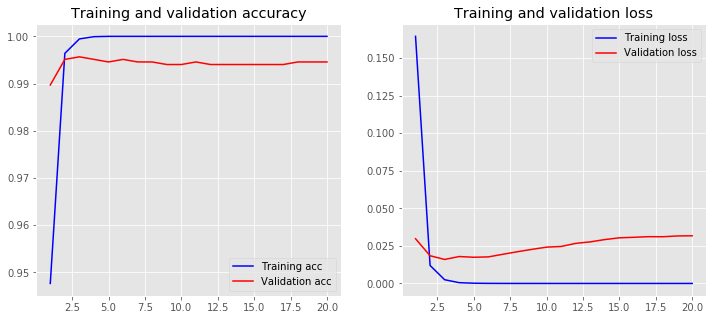

In [0]:

start=time.time()
history2 = model2.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_dev_x, nf_dev_y),
                    batch_size=10)
loss, accuracy = model2.evaluate(em_nf_train_x, nf_train_y, verbose=False)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(em_nf_dev_x, nf_dev_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history2)



2 Models great accuracy , we shall keep embed dim as 25 due to less time.
Adding regularizers because of overfitting


In [0]:

#working on kernel (weight) and bias regularizer for now
#more aggresiive 
#Model 3
embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

model3 = Sequential()
model3.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model3.add(layers.GlobalMaxPool1D())
model3.add(layers.Dense(h1, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model3.add(layers.Dense(h2, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model3.summary()

16 10
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 4734, 25)          2613975   
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 25)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                416       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 2,614,572
Trainable params: 2,614,572
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9967
Time take -24.51870768070221


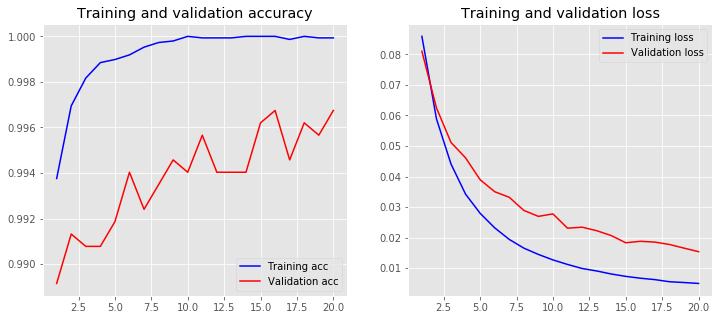

In [0]:

start=time.time()
history3 = model3.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_dev_x, nf_dev_y),
                    batch_size=10)
loss, accuracy = model3.evaluate(em_nf_train_x, nf_train_y, verbose=False)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(em_nf_dev_x, nf_dev_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history3)



In [0]:

#working on kernel (weight) and bias regularizer for now
#less aggresiive 
#Model 4
embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

model4 = Sequential()
model4.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model4.add(layers.GlobalMaxPool1D())
model4.add(layers.Dense(h1, activation='relu',kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model4.add(layers.Dense(h2, activation='relu',kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model4.add(layers.Dense(1, activation='sigmoid'))
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model4.summary()

16 10
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 4734, 25)          2613975   
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 25)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                416       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 2,614,572
Trainable params: 2,614,572
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9951
Time take -21.810198044776918


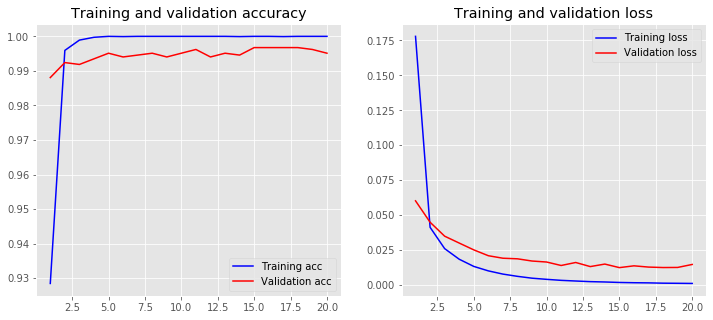

In [0]:

start=time.time()
history4 = model4.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_dev_x, nf_dev_y),
                    batch_size=10)
loss, accuracy = model4.evaluate(em_nf_train_x, nf_train_y, verbose=False)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model4.evaluate(em_nf_dev_x, nf_dev_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history4)



In [0]:

#activity regularizer
#Model 5
embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

model5 = Sequential()
model5.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model5.add(layers.GlobalMaxPool1D())
model5.add(layers.Dense(h1, activation='relu',activity_regularizer=l2(0.001)))
model5.add(layers.Dense(h2, activation='relu',activity_regularizer=l2(0.001)))
model5.add(layers.Dense(1, activation='sigmoid'))
model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model5.summary()

16 10
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 4734, 25)          2613975   
_________________________________________________________________
global_max_pooling1d_14 (Glo (None, 25)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                416       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 2,614,572
Trainable params: 2,614,572
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9995
Testing Accuracy:  0.9794
Time take -21.279477938016257


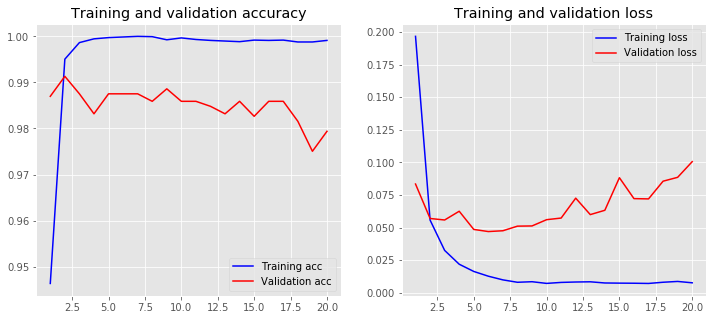

In [0]:

start=time.time()
history5 = model5.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_dev_x, nf_dev_y),
                    batch_size=10)
loss, accuracy = model5.evaluate(em_nf_train_x, nf_train_y, verbose=False)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model5.evaluate(em_nf_dev_x, nf_dev_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history5)



In [0]:

#activity regularizer
#super aggresive
#Model 6
embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

model6 = Sequential()
model6.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model6.add(layers.GlobalMaxPool1D())
model6.add(layers.Dense(h1, activation='relu',activity_regularizer=l2(0.1)))
model6.add(layers.Dense(h2, activation='relu',activity_regularizer=l2(0.1)))
model6.add(layers.Dense(1, activation='sigmoid'))
model6.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model6.summary()

16 10
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 4734, 25)          2613975   
_________________________________________________________________
global_max_pooling1d_15 (Glo (None, 25)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                416       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 2,614,572
Trainable params: 2,614,572
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9998
Testing Accuracy:  0.9837
Time take -21.11475927432378


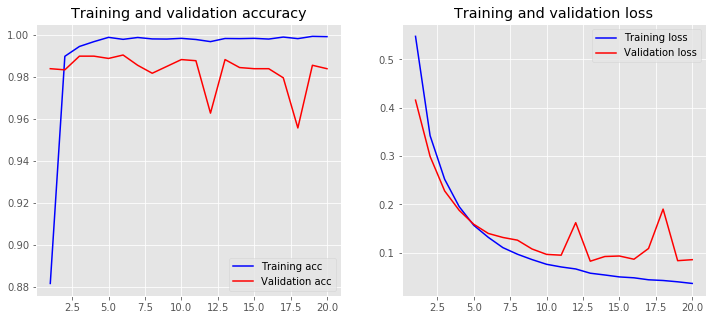

In [0]:

start=time.time()
history6 = model6.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_dev_x, nf_dev_y),
                    batch_size=10)
loss, accuracy = model6.evaluate(em_nf_train_x, nf_train_y, verbose=False)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model6.evaluate(em_nf_dev_x, nf_dev_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history6)



In [0]:

#all regularizer
#super aggresive
#Model 7
embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

model7 = Sequential()
model7.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model7.add(layers.GlobalMaxPool1D())
model7.add(layers.Dense(h1, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model7.add(layers.Dense(h2, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model7.add(layers.Dense(1, activation='sigmoid'))
model7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model7.summary()

16 10
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 4734, 25)          2613975   
_________________________________________________________________
global_max_pooling1d_17 (Glo (None, 25)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 16)                416       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 2,614,572
Trainable params: 2,614,572
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9875
Time take -21.96340678135554


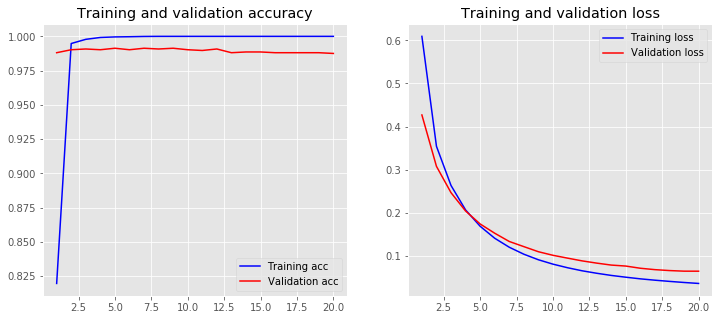

In [0]:

start=time.time()
history7 = model7.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_dev_x, nf_dev_y),
                    batch_size=10)
loss, accuracy = model7.evaluate(em_nf_train_x, nf_train_y, verbose=False)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model7.evaluate(em_nf_dev_x, nf_dev_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history7)



In [0]:

#dropout regularizer
#Model 8
embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

model8 = Sequential()
model8.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model8.add(layers.GlobalMaxPool1D())
model8.add(layers.Dense(h1, activation='relu'))
model8.add(layers.Dropout(0.2))
model8.add(layers.Dense(h2, activation='relu'))
model8.add(layers.Dropout(0.2))
model8.add(layers.Dense(1, activation='sigmoid'))
model8.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model8.summary()

16 10
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 4734, 25)          2613975   
_________________________________________________________________
global_max_pooling1d_28 (Glo (None, 25)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 16)                416       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 10)                170       
_________________________________________________________________
dropout_17 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 1)         

Training Accuracy: 1.0000
Testing Accuracy:  0.9951
Time take -21.123333859443665


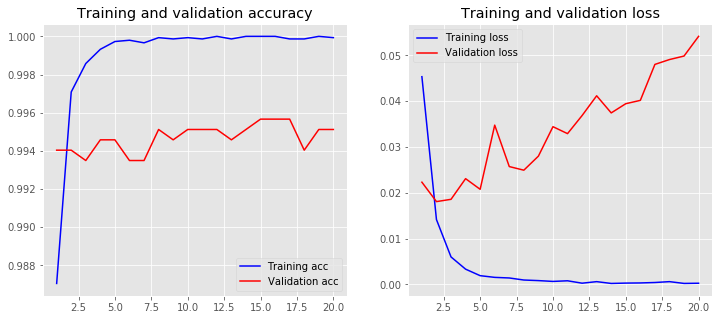

In [0]:

start=time.time()
history8 = model8.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_dev_x, nf_dev_y),
                    batch_size=10)
loss, accuracy = model8.evaluate(em_nf_train_x, nf_train_y, verbose=False)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model8.evaluate(em_nf_dev_x, nf_dev_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history8)



In [0]:
from keras.layers import Dropout
from keras.regularizers import l2

#all regularizer+dropout

#Model 9
embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

model9 = Sequential()
model9.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model9.add(layers.GlobalMaxPool1D())
model9.add(layers.Dense(h1, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model9.add(layers.Dropout(0.2))
model9.add(layers.Dense(h2, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model9.add(layers.Dropout(0.2))
model9.add(layers.Dense(1, activation='sigmoid'))
model9.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model9.summary()

16 10
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 4734, 25)          2613975   
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 25)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                416       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)          









Training Accuracy: 1.0000
Testing Accuracy:  0.9919
Time take -20.839740471045175


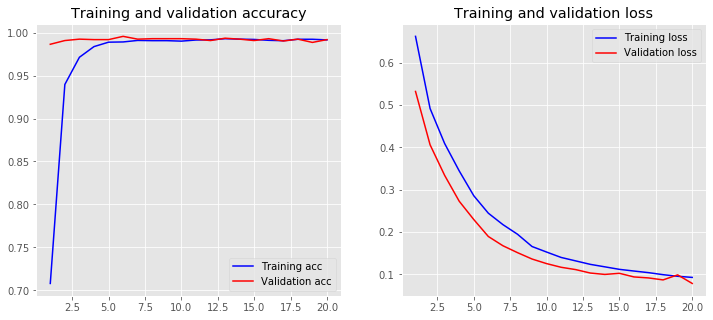

In [0]:

start=time.time()
history9 = model9.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_dev_x, nf_dev_y),
                    batch_size=10)
loss, accuracy = model9.evaluate(em_nf_train_x, nf_train_y, verbose=False)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model9.evaluate(em_nf_dev_x, nf_dev_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history9)



In [0]:

#all regularizer+dropout

#Model 10
embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

model10 = Sequential()
model10.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model10.add(layers.GlobalMaxPool1D())
model10.add(layers.Dense(h1, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1)))
model10.add(layers.Dropout(0.3))
model10.add(layers.Dense(h2, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1)))
model10.add(layers.Dropout(0.3))
model10.add(layers.Dense(1, activation='sigmoid'))
model10.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model9.summary()

16 10
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 4734, 25)          2613975   
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 25)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                416       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)          

Training Accuracy: 0.5836
Testing Accuracy:  0.5873
Time take -21.338738254706065


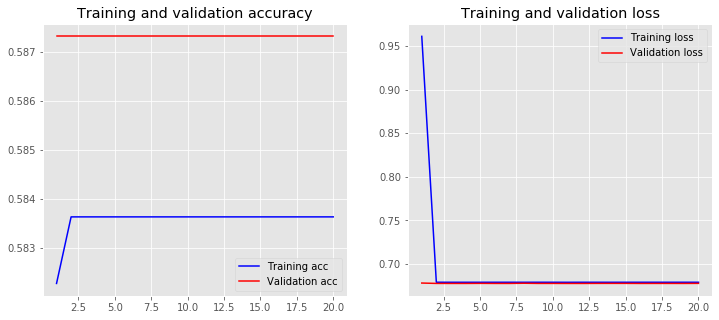

In [0]:

start=time.time()
history10 = model10.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_dev_x, nf_dev_y),
                    batch_size=10)
loss, accuracy = model10.evaluate(em_nf_train_x, nf_train_y, verbose=False)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model10.evaluate(em_nf_dev_x, nf_dev_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history10)



Best models to be used are 2,7 and 9. I feel there is a bit too much overfiting, tried balancing it with regularizers , unable to do it.

In [0]:
"""
Final models tested on test dataset :)


"""

'\nFinal models tested on test dataset :)\n\n\n'

In [0]:
#Model 2
embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

model2 = Sequential()
model2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model2.add(layers.GlobalMaxPool1D())
model2.add(layers.Dense(h1, activation='relu'))
model2.add(layers.Dense(h2, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

16 10


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 4734, 25)          2613975   
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 25)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                416       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 2,614,572
Trainable params: 2,614,572
Non-trainable params: 0
_________________________________________________________________


14749/14749 [==============================] - 3s 232us/step
Training Accuracy: 1.0000
1844/1844 [==============================] - 0s 238us/step
Testing Accuracy:  0.9919
Time take -21.303382178147633


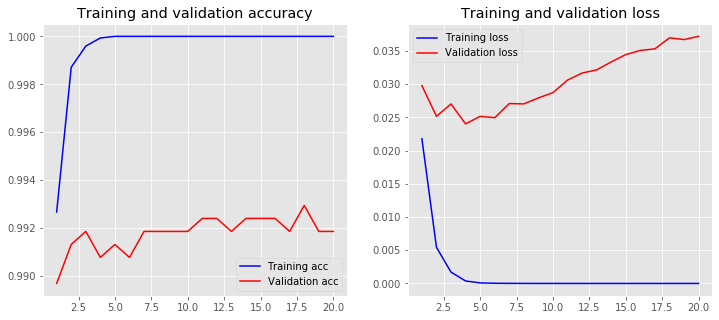

In [0]:

start=time.time()
history2t = model2.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_test_x, nf_test_y),
                    batch_size=10)
loss, accuracy = model2.evaluate(em_nf_train_x, nf_train_y, verbose=1)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(em_nf_test_x, nf_test_y, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history2t)



In [0]:
from keras.layers import Dropout
from keras.regularizers import l2

#all regularizer+dropout

#Model 9
embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

model9 = Sequential()
model9.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model9.add(layers.GlobalMaxPool1D())
model9.add(layers.Dense(h1, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model9.add(layers.Dropout(0.2))
model9.add(layers.Dense(h2, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model9.add(layers.Dropout(0.2))
model9.add(layers.Dense(1, activation='sigmoid'))
model9.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model9.summary()

16 10
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 4734, 25)          2613975   
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 25)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                416       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                170       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)          

14749/14749 [==============================] - 4s 241us/step
Training Accuracy: 1.0000
1844/1844 [==============================] - 0s 247us/step
Testing Accuracy:  0.9892
Time take -21.177581612269083


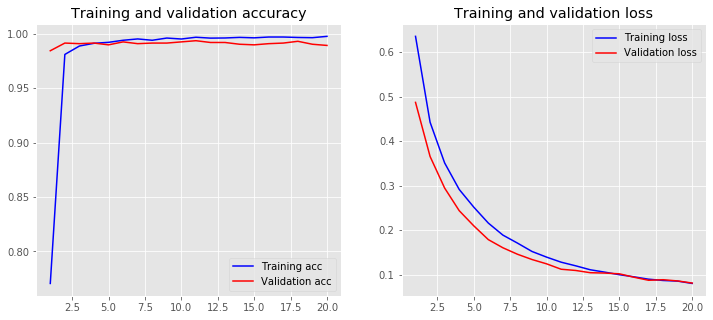

In [0]:

start=time.time()
history9t = model9.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_test_x, nf_test_y),
                    batch_size=10)
loss, accuracy = model9.evaluate(em_nf_train_x, nf_train_y, verbose=1)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model9.evaluate(em_nf_test_x, nf_test_y, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history9t)



In [0]:

#all regularizer
#super aggresive
#Model 7
embedding_dim = 25
h1=int(2/3*embedding_dim)
h2=int(2/3*h1)
print(h1,h2)

model7 = Sequential()
model7.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model7.add(layers.GlobalMaxPool1D())
model7.add(layers.Dense(h1, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model7.add(layers.Dense(h2, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model7.add(layers.Dense(1, activation='sigmoid'))
model7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model7.summary()

16 10
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 4734, 25)          2613975   
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 25)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                416       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 2,614,572
Trainable params: 2,614,572
Non-trainable params: 0
_________________________________________________________________


14749/14749 [==============================] - 3s 221us/step
Training Accuracy: 0.9999
1844/1844 [==============================] - 0s 226us/step
Testing Accuracy:  0.9886
Time take -21.323074348767598


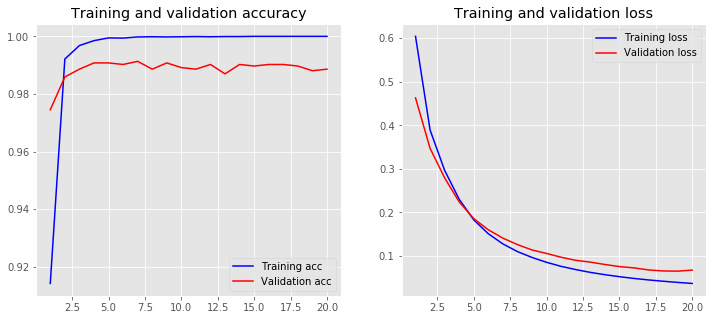

In [0]:

start=time.time()
history7t = model7.fit(em_nf_train_x, nf_train_y,
                    epochs=20,
                    verbose=False,
                    validation_data=(em_nf_test_x, nf_test_y),
                    batch_size=10)
loss, accuracy = model7.evaluate(em_nf_train_x, nf_train_y, verbose=1)


print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model7.evaluate(em_nf_test_x, nf_test_y, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))


stop=time.time()
print('Time take',(start-stop)/60)
plot_history(history7t)



Model 9 is the best generalized model
